<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Clusterização</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas


In [1]:
#pip install threadpoolctl==3.1.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import ImageFont, Image, ImageDraw

<div style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>

<h2>📊 Introdução ao Problema de Segmentação de Clientes</h2>

<h3>🌐 Contexto e Importância da Segmentação de Clientes:</h3>
<p><strong>Segmentação de clientes</strong> é uma prática crucial em marketing e gestão de relacionamento com clientes. Envolve a <strong>divisão de uma base de clientes</strong> em grupos distintos com características semelhantes. Essa divisão permite personalizar estratégias para atender às necessidades específicas de cada segmento, melhorando a satisfação do cliente, a retenção e a lucratividade. No contexto do seu negócio, a segmentação ajuda a identificar oportunidades de mercado, desenvolver produtos ou serviços mais adequados e direcionar esforços de marketing de forma mais eficiente.</p>

<h3>🎯 Objetivos da Segmentação:</h3>
<p>🔹 Identificar <strong>padrões e tendências</strong> dentro da base de clientes.<br>
🔹 Agrupar clientes com <strong>características semelhantes</strong>, como hábitos de compra, preferências, demografia, entre outros.<br>
🔹 Criar <strong>perfis de cliente</strong> para estratégias de marketing direcionadas e personalização de produtos/serviços.<br>
🔹 Melhorar a <strong>alocação de recursos</strong> e a eficácia das campanhas de marketing.</p>

<h3>⚙️ Métodos Potenciais para Segmentação:</h3>
<p>🔹 <strong>Análise de Cluster</strong>: Utilizando algoritmos de aprendizado de máquina não supervisionado (como K-means, DBSCAN, ou algoritmos hierárquicos) para agrupar clientes com base em características similares.<br>
🔹 <strong>Análise RFM (Recency, Frequency, Monetary)</strong>: Segmentação com base na recentidade da última compra, frequência de compras e valor monetário das compras.<br>
🔹 <strong>Análise Baseada em Persona</strong>: Criar personas de clientes com base em dados demográficos, psicográficos, e comportamentais.</p>

<h3>⚠️ Desafios e Considerações:</h3>
<p>🔹 Lidar com <strong>grandes volumes de dados</strong> e garantir a qualidade e a integridade dos mesmos.<br>
🔹 Selecionar as <strong>variáveis corretas</strong> para a análise, que tenham maior impacto na diferenciação entre os clientes.<br>
🔹 Estar ciente do <strong>viés</strong> e garantir que a segmentação não promova estereótipos ou discriminação.</p>

</div>


## 1.0 Data Reading


In [3]:
df = pd.read_csv('BancoDeDados.csv')

In [4]:
df.head()

amostra                        id_cliente  \
0        0  06b8999e2fba1a1fbc88172c00ba8bc7   
1        1  8912fc0c3bbf1e2fbf35819e21706718   
2        2  8912fc0c3bbf1e2fbf35819e21706718   
3        3  f0ac8e5a239118859b1734e1087cbb1f   
4        4  6bc8d08963a135220ed6c6d098831f84   

                   id_unico_cliente  item_id  cep_cliente   cidade_cliente  \
0  861eff4711a542e4b93843c6dd7febb0        1        14409           franca   
1  9eae34bbd3a474ec5d07949ca7de67c0        1        68030         santarem   
2  9eae34bbd3a474ec5d07949ca7de67c0        2        68030         santarem   
3  3c799d181c34d51f6d44bbbc563024db        1        92480  nova santa rita   
4  23397e992b09769faf5e66f9e171a241        1        25931             mage   

  estado_cliente                         id_pedido status_pedido  \
0             SP  00e7ee1b050b8499577073aeb2a297a1     delivered   
1             PA  c1d2b34febe9cd269e378117d6681172     delivered   
2             PA  c1d2b34febe9cd269e378117d6681172     delivered   
3             RS  b1a5d5365d330d10485e0203d54ab9e8     delivered   
4             RJ  2e604b3614664aa66867856dba7e61b7     delivered   

        horario_pedido  ... pagamento_sequencial pagamento_tipo  \
0  2017-05-16 15:05:35  ...                    1    credit_card   
1  2017-11-09 00:50:13  ...                    1    credit_card   
2  2017-11-09 00:50:13  ...                    1    credit_card   
3  2017-05-07 20:11:26  ...                    1    credit_card   
4  2018-02-03 19:45:40  ...                    1    credit_card   

  pagamento_prestacoes pagamento_valor review          categoria  \
0                    2          146.87      4  moveis_escritorio   
1                    1          275.79      1  moveis_escritorio   
2                    1          275.79      1  moveis_escritorio   
3                    7          140.61      3  moveis_escritorio   
4                   10          137.58      4  moveis_escritorio   

   categoria_ingles  cep_vendedor  cidade_vendedor  estado_vendedor  
0  office_furniture          8577  itaquaquecetuba               SP  
1  office_furniture          8577  itaquaquecetuba               SP  
2  office_furniture          8577  itaquaquecetuba               SP  
3  office_furniture          8577  itaquaquecetuba               SP  
4  office_furniture          8577  itaquaquecetuba               SP  

[5 rows x 27 columns]

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [6]:
df.dtypes

amostra                   int64
id_cliente               object
id_unico_cliente         object
item_id                   int64
cep_cliente               int64
cidade_cliente           object
estado_cliente           object
id_pedido                object
status_pedido            object
horario_pedido           object
pedido_aprovado          object
pedido_entregador        object
pedido_entregue          object
data_estimada            object
id_vendedor              object
preco                   float64
frete                   float64
pagamento_sequencial      int64
pagamento_tipo           object
pagamento_prestacoes      int64
pagamento_valor         float64
review                    int64
categoria                object
categoria_ingles         object
cep_vendedor              int64
cidade_vendedor          object
estado_vendedor          object
dtype: object

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [8]:
df.describe()

amostra        item_id    cep_cliente          preco  \
count  116581.000000  116581.000000  116581.000000  116581.000000   
mean    58290.000000       1.196953   35053.391556     120.751369   
std     33654.180203       0.701350   29817.864821     183.848421   
min         0.000000       1.000000    1003.000000       0.850000   
25%     29145.000000       1.000000   11310.000000      39.900000   
50%     58290.000000       1.000000   24315.000000      74.900000   
75%     87435.000000       1.000000   58600.000000     134.900000   
max    116580.000000      21.000000   99980.000000    6735.000000   

               frete  pagamento_sequencial  pagamento_prestacoes  \
count  116581.000000         116581.000000         116581.000000   
mean       20.062550              1.093369              2.949614   
std        15.845515              0.727240              2.783798   
min         0.000000              1.000000              0.000000   
25%        13.080000              1.000000              1.000000   
50%        16.320000              1.000000              2.000000   
75%        21.220000              1.000000              4.000000   
max       409.680000             29.000000             24.000000   

       pagamento_valor         review   cep_vendedor  
count    116581.000000  116581.000000  116581.000000  
mean        172.910258       4.017507   24504.889030  
std         267.622516       1.397886   27625.157426  
min           0.000000       1.000000    1001.000000  
25%          61.000000       4.000000    6429.000000  
50%         108.190000       5.000000   13690.000000  
75%         189.720000       5.000000   28495.000000  
max       13664.080000       5.000000   99730.000000

## Estatísticas Descritivas (Variáveis Numéricas)
<hr>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Preço e Frete</b>: A média do preço dos produtos é de aproximadamente 120,75 reais, enquanto a média do frete é de cerca de 20,06. Há uma grande variação nesses valores, indicando diversidade nas categorias de produtos e custos de entrega.</p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Pagamentos:</b> Em média, os pagamentos são feitos em cerca de 3 prestações, com um valor médio de pagamento de 172,91.</p>

## Variáveis Categóricas
<hr>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Clientes Únicos e Pedidos:</b> Há 97.255 identificações de clientes e 94.087 clientes únicos, indicando a possibilidade de múltiplos pedidos por cliente.</p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Localização e Categoria:</b> A base contém dados de 4.095 cidades diferentes e 71 categorias de produtos, sugerindo uma diversidade geográfica e de produtos.
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Localização e Categoria:</b> A base contém dados de 4.095 cidades diferentes e 71 categorias de produtos, sugerindo uma diversidade geográfica e de produtos.</p>

## Valores Ausentes
<hr>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Alguns campos como pedido_aprovado, pedido_entregador, e pedido_entregue têm valores ausentes. É necessário decidir como lidar com esses dados faltantes, pois podem influenciar a análise de segmentação.</p>

# <font color='red' style='font-size: 30px;'>Análise Exploratória</font>
<hr style='border: 2px solid red;'>

In [9]:
def plot_perc(st, dados):
    plt.figure(figsize=(20,8))
    
    g=sns.countplot(x=st, data=dados, orient='h')
    g.set_ylabel('Contagem', fontsize=17)
    
    sizes = []
    
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x() + p.get_width()/1.6,
              height+200,
              '{:1.2f}%'.format(height/116581*100),
              ha = 'center', va='bottom', fontsize=12)
        
    g.set_ylim(0, max(sizes)*1.1)

### Faturamento por Meios de Pagamento

In [10]:
plot_perc('pagamento_tipo', df)

### - Quantidade de Cliente por estado

In [11]:
plot_perc('estado_cliente', df)

### - Faturamento por quantidade de Parcelas

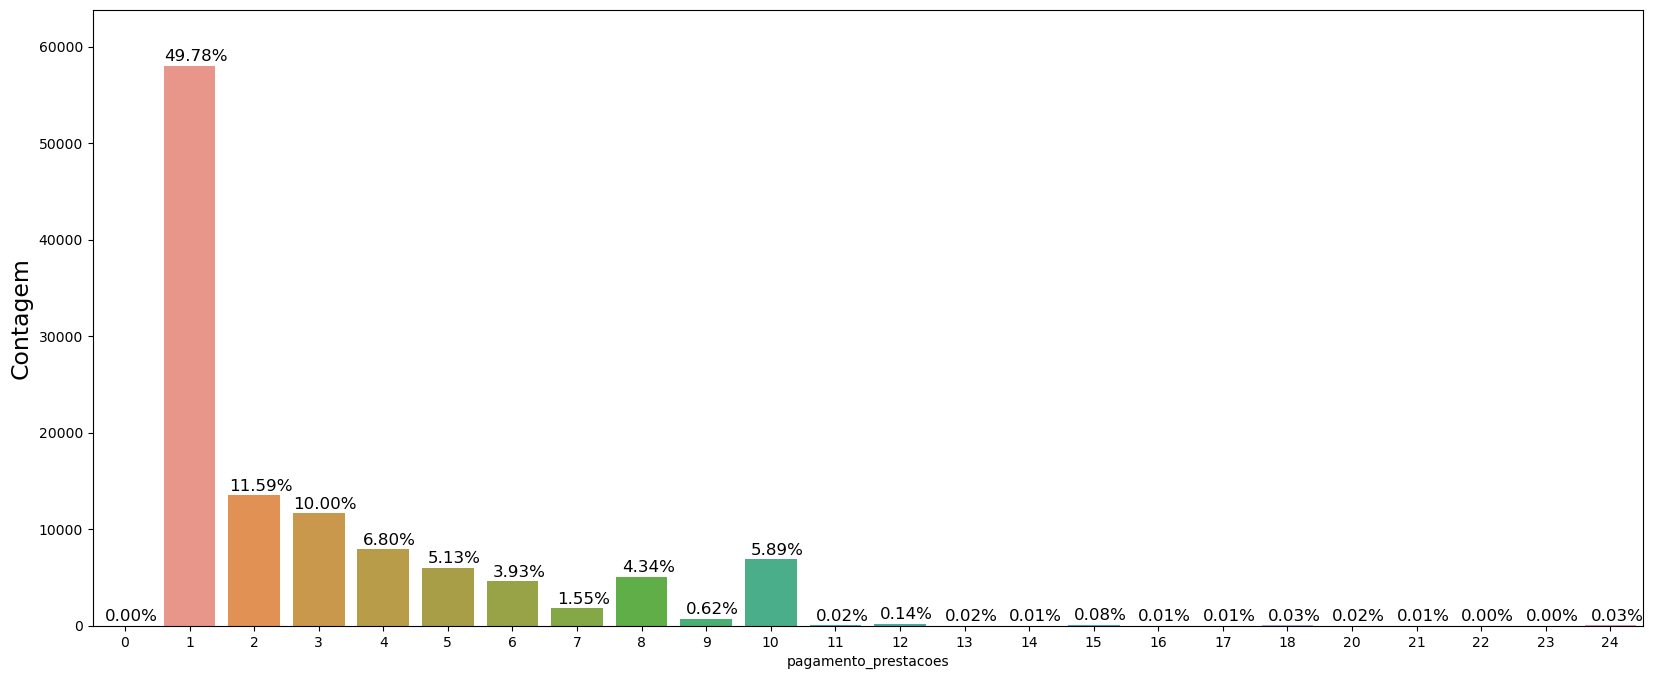

In [12]:
plot_perc('pagamento_prestacoes', df)

# <font color='red' style='font-size: 30px;'>Modelo RFM</font>
<hr style='border: 2px solid red;'>

#### Recência(R)

###### Há quantos dias foi a última compra desse cliente?

#### Frequencia (F)
###### Quantas compras esse cliente já fez na sua empresa, desde que se cadastrou?

#### Monetaridade (M)
###### Quanto esse cliente já gastou em dinheiro na sua empresa?

In [14]:
# Convertendo 'horario_pedido' para datetime, se ainda não estiver convertido
df['horario_pedido'] = pd.to_datetime(df['horario_pedido'])

# Calculando Monetary
receita = df.groupby('id_unico_cliente')['preco'].sum()

# Calculando Recency
# Considerando a data mais recente no dataset como 'hoje' para cálculo de recência
data_recente = df['horario_pedido'].max()
recencia = df.groupby('id_unico_cliente')['horario_pedido'].max()
recencia = (data_recente - recencia).dt.days

# Calculando Frequency
frequencia = df.groupby('id_unico_cliente')['id_pedido'].size()

# Criando um novo DataFrame para RFM
rfm = pd.DataFrame({
    'recencia': recencia,
    'frequencia': frequencia,
    'receita': receita
})

# Visualizando as primeiras linhas do DataFrame RFM
rfm.head()


recencia  frequencia  receita
id_unico_cliente                                               
0000366f3b9a7992bf8c76cfdf3221e2       115           1   129.90
0000b849f77a49e4a4ce2b2a4ca5be3f       118           1    18.90
0000f46a3911fa3c0805444483337064       541           1    69.00
0000f6ccb0745a6a4b88665a16c9f078       325           1    25.99
0004aac84e0df4da2b147fca70cf8255       292           1   180.00

In [15]:
rfm.describe()

recencia    frequencia       receita
count  94087.000000  94087.000000  94087.000000
mean     241.902558      1.239077    149.620196
std      153.156396      0.850594    249.746766
min        0.000000      1.000000      0.850000
25%      118.000000      1.000000     48.900000
50%      222.000000      1.000000     89.900000
75%      351.000000      1.000000    159.900000
max      728.000000     75.000000  13440.000000

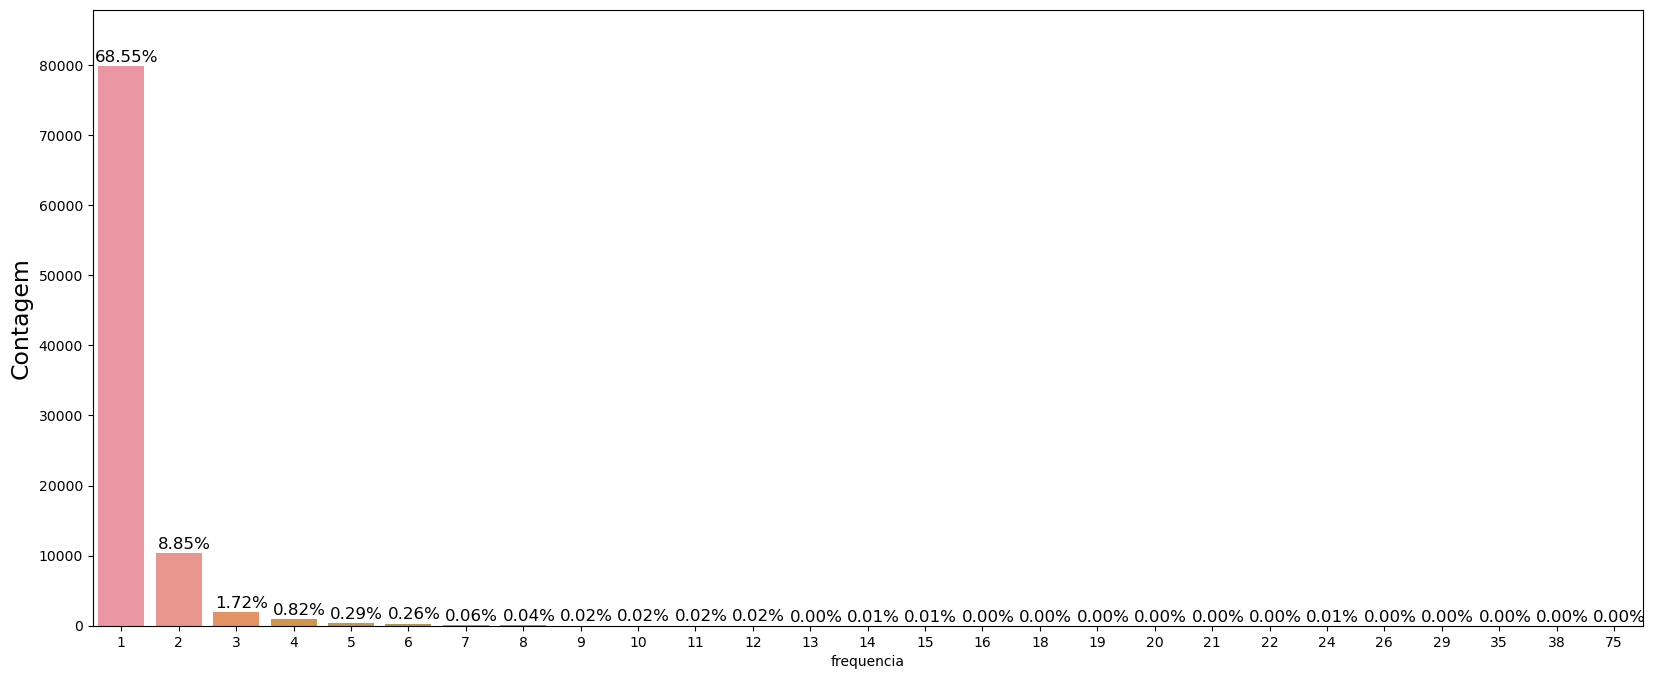

In [16]:
plot_perc('frequencia', rfm)

In [17]:
rfm = rfm.reset_index()

In [20]:
rfm.describe()

recencia    frequencia       receita
count  94087.000000  94087.000000  94087.000000
mean     241.902558      1.239077    149.620196
std      153.156396      0.850594    249.746766
min        0.000000      1.000000      0.850000
25%      118.000000      1.000000     48.900000
50%      222.000000      1.000000     89.900000
75%      351.000000      1.000000    159.900000
max      728.000000     75.000000  13440.000000

### - Regra do Cotovelo

In [21]:
def calcular_wcss(data):
    wcss=[]
    for k in range(1, 10):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X=data)
        data['Clusters']=kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss

In [22]:
from sklearn.cluster import KMeans

df_recencia = rfm.loc[:,['recencia']].copy()
df_recencia.head()

recencia
0       115
1       118
2       541
3       325
4       292

In [23]:
soma_quadrados = calcular_wcss(df_recencia)

C:\Users\luizf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\luizf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\luizf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\luizf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [24]:
soma_quadrados

[2206964152.6542234,
 652844430.890193,
 290852385.0408022,
 172126922.39160097,
 108823884.09409669,
 77262825.87528567,
 56131966.90070206,
 44736273.92441615,
 35497110.413755104]

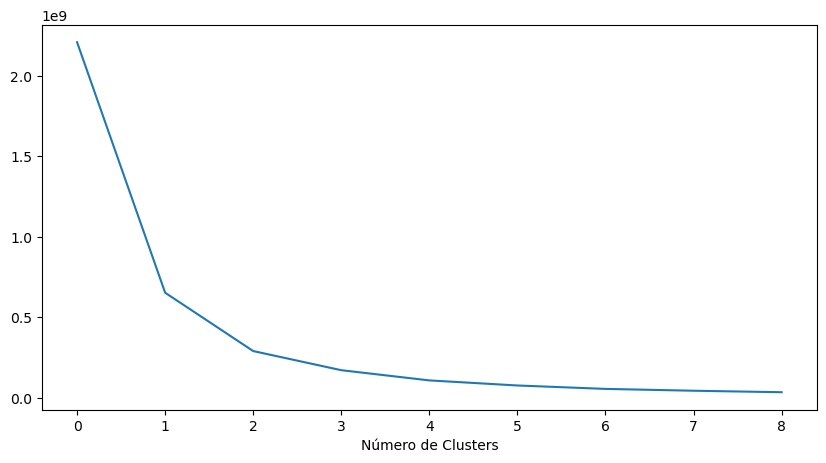

In [25]:
plt.figure(figsize=(10,5))
plt.plot(soma_quadrados)
plt.xlabel('Número de Clusters')
plt.show()

In [26]:
import math

def numero_otimo_clusters(wcss):
    x1, y1 = 2,wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]
    
    distancia = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerador = abs((y2 - y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancia.append(numerador/denominador)
    return distancia.index(max(distancia)) + 2

In [27]:
n = numero_otimo_clusters(soma_quadrados)

In [28]:
n

4



### - Criando a Coluna RecenciaCluster



In [29]:
kmeans = KMeans(n_clusters=4)
rfm['RecenciaCluster'] = kmeans.fit_predict(df_recencia)
rfm.head()

C:\Users\luizf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


id_unico_cliente  recencia  frequencia  receita  \
0  0000366f3b9a7992bf8c76cfdf3221e2       115           1   129.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f       118           1    18.90   
2  0000f46a3911fa3c0805444483337064       541           1    69.00   
3  0000f6ccb0745a6a4b88665a16c9f078       325           1    25.99   
4  0004aac84e0df4da2b147fca70cf8255       292           1   180.00   

   RecenciaCluster  
0                2  
1                2  
2                1  
3                0  
4                0

### - Verificando a média da recencia para cada um dos clusters

In [30]:
agrupado_cluster = rfm.groupby('RecenciaCluster')['recencia'].mean().reset_index()
agrupado_cluster

RecenciaCluster    recencia
0                0  318.376761
1                1  488.674315
2                2   65.982412
3                3  187.243748

- Devemos organizar a Recencia de forma que o que tem menos tempo que comprou fique com uma nota maior do que os clientes que poussuem mais tempo que compraram 

In [31]:
agrupado_cluster_ordenado = agrupado_cluster.sort_values(by='recencia', ascending=False).reset_index(drop=True)
agrupado_cluster_ordenado

RecenciaCluster    recencia
0                1  488.674315
1                0  318.376761
2                3  187.243748
3                2   65.982412

In [32]:
agrupado_cluster_ordenado['index'] = agrupado_cluster_ordenado.index
agrupado_cluster_ordenado

RecenciaCluster    recencia  index
0                1  488.674315      0
1                0  318.376761      1
2                3  187.243748      2
3                2   65.982412      3

In [33]:
juntando_cluster = pd.merge(rfm, agrupado_cluster_ordenado[['RecenciaCluster', 'index']], on='RecenciaCluster')
juntando_cluster

id_unico_cliente  recencia  frequencia  receita  \
0      0000366f3b9a7992bf8c76cfdf3221e2       115           1   129.90   
1      0000b849f77a49e4a4ce2b2a4ca5be3f       118           1    18.90   
2      000e309254ab1fc5ba99dd469d36bdb4        69           2   119.80   
3      000ec5bff359e1c0ad76a81a45cb598f        12           1    14.96   
4      000ed48ceeb6f4bf8ad021a10a3c7b43       105           1    12.88   
...                                 ...       ...         ...      ...   
94082  ffecceca389973ef16660d58696f281e       130           1    59.90   
94083  fff1bdd5c5e37ca79dd74deeb91aa5b6       190           1   134.90   
94084  fff2ae16b99c6f3c785f0e052f2a9cfb       135           1   129.94   
94085  fff7219c86179ca6441b8f37823ba3d3       249           2   245.80   
94086  fffcc512b7dfecaffd80f13614af1d16       145           1   688.00   

       RecenciaCluster  index  
0                    2      3  
1                    2      3  
2                    2      3  
3                    2      3  
4                    2      3  
...                ...    ...  
94082                3      2  
94083                3      2  
94084                3      2  
94085                3      2  
94086                3      2  

[94087 rows x 6 columns]

In [34]:
removendo_dados = juntando_cluster.drop(['RecenciaCluster'],axis=1)
removendo_dados

id_unico_cliente  recencia  frequencia  receita  index
0      0000366f3b9a7992bf8c76cfdf3221e2       115           1   129.90      3
1      0000b849f77a49e4a4ce2b2a4ca5be3f       118           1    18.90      3
2      000e309254ab1fc5ba99dd469d36bdb4        69           2   119.80      3
3      000ec5bff359e1c0ad76a81a45cb598f        12           1    14.96      3
4      000ed48ceeb6f4bf8ad021a10a3c7b43       105           1    12.88      3
...                                 ...       ...         ...      ...    ...
94082  ffecceca389973ef16660d58696f281e       130           1    59.90      2
94083  fff1bdd5c5e37ca79dd74deeb91aa5b6       190           1   134.90      2
94084  fff2ae16b99c6f3c785f0e052f2a9cfb       135           1   129.94      2
94085  fff7219c86179ca6441b8f37823ba3d3       249           2   245.80      2
94086  fffcc512b7dfecaffd80f13614af1d16       145           1   688.00      2

[94087 rows x 5 columns]

In [35]:
df_final = removendo_dados.rename(columns={'index':'RecenciaCluster'})
df_final.head()

id_unico_cliente  recencia  frequencia  receita  \
0  0000366f3b9a7992bf8c76cfdf3221e2       115           1   129.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f       118           1    18.90   
2  000e309254ab1fc5ba99dd469d36bdb4        69           2   119.80   
3  000ec5bff359e1c0ad76a81a45cb598f        12           1    14.96   
4  000ed48ceeb6f4bf8ad021a10a3c7b43       105           1    12.88   

   RecenciaCluster  
0                3  
1                3  
2                3  
3                3  
4                3

- Criando uma função para facilitar o processo

### -Criando uma função para facilitar o processo de criação das colunas de clusters

In [36]:
def ordenador_cluster(cluster_nome, target_nome, df, ordem):
    agrupado_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
    agrupado_cluster_ordenado = agrupado_cluster.sort_values(by=target_nome, ascending=ordem).reset_index(drop=True)
    agrupado_cluster_ordenado['index'] = agrupado_cluster_ordenado.index
    juntando_cluster = pd.merge(df, agrupado_cluster_ordenado[[cluster_nome, 'index']], on=cluster_nome)
    removendo_dados = juntando_cluster.drop([cluster_nome],axis=1)
    df_final = removendo_dados.rename(columns={'index':cluster_nome})
    return df_final





In [37]:
rfm = ordenador_cluster('RecenciaCluster', 'recencia', rfm,False)
rfm

id_unico_cliente  recencia  frequencia  receita  \
0      0000366f3b9a7992bf8c76cfdf3221e2       115           1   129.90   
1      0000b849f77a49e4a4ce2b2a4ca5be3f       118           1    18.90   
2      000e309254ab1fc5ba99dd469d36bdb4        69           2   119.80   
3      000ec5bff359e1c0ad76a81a45cb598f        12           1    14.96   
4      000ed48ceeb6f4bf8ad021a10a3c7b43       105           1    12.88   
...                                 ...       ...         ...      ...   
94082  ffecceca389973ef16660d58696f281e       130           1    59.90   
94083  fff1bdd5c5e37ca79dd74deeb91aa5b6       190           1   134.90   
94084  fff2ae16b99c6f3c785f0e052f2a9cfb       135           1   129.94   
94085  fff7219c86179ca6441b8f37823ba3d3       249           2   245.80   
94086  fffcc512b7dfecaffd80f13614af1d16       145           1   688.00   

       RecenciaCluster  
0                    3  
1                    3  
2                    3  
3                    3  
4                    3  
...                ...  
94082                2  
94083                2  
94084                2  
94085                2  
94086                2  

[94087 rows x 5 columns]

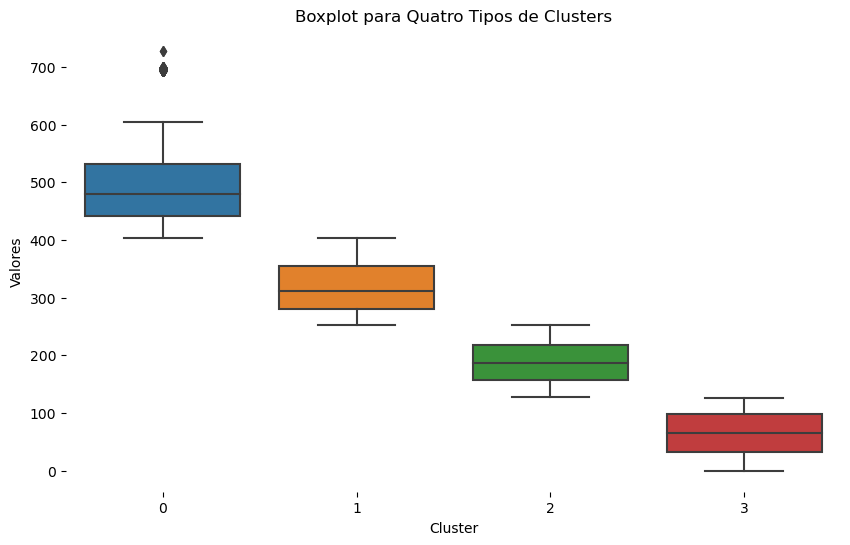

In [38]:
# Criação do boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='RecenciaCluster', y='recencia', data=rfm)

plt.title('Boxplot Recência')
plt.xlabel('Cluster')
plt.ylabel('Valores')

#Removendo as bordas (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

In [39]:
rfm.groupby('RecenciaCluster')['recencia'].describe()

count        mean        std    min    25%    50%    75%  \
RecenciaCluster                                                               
0                16691.0  488.674315  59.462692  404.0  441.0  480.0  531.0   
1                24562.0  318.376761  43.521438  253.0  281.0  311.0  355.0   
2                27192.0  187.243748  35.123741  127.0  157.0  187.0  218.0   
3                25642.0   65.982412  35.882713    0.0   33.0   66.0   99.0   

                   max  
RecenciaCluster         
0                728.0  
1                403.0  
2                252.0  
3                126.0

### - Criando a Coluna FrequanciaCluster

In [40]:
df_frequencia = df.groupby('id_unico_cliente')['pedido_aprovado'].count().reset_index()
df_frequencia.columns = ['id_unico_cliente', 'Frequencia']
df_frequencia

id_unico_cliente  Frequencia
0      0000366f3b9a7992bf8c76cfdf3221e2           1
1      0000b849f77a49e4a4ce2b2a4ca5be3f           1
2      0000f46a3911fa3c0805444483337064           1
3      0000f6ccb0745a6a4b88665a16c9f078           1
4      0004aac84e0df4da2b147fca70cf8255           1
...                                 ...         ...
94082  fffcf5a5ff07b0908bd4e2dbc735a684           2
94083  fffea47cd6d3cc0a88bd621562a9d061           1
94084  ffff371b4d645b6ecea244b27531430a           1
94085  ffff5962728ec6157033ef9805bacc48           1
94086  ffffd2657e2aad2907e67c3e9daecbeb           1

[94087 rows x 2 columns]

- Criando a coluna **FrequenciaCluster**

In [42]:
df_frequencia = rfm[['frequencia']]
kmeans = KMeans(n_clusters = 4)
rfm['FrequenciaCluster'] = kmeans.fit_predict(df_frequencia)
rfm

C:\Users\luizf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


id_unico_cliente  recencia  frequencia  receita  \
0      0000366f3b9a7992bf8c76cfdf3221e2       115           1   129.90   
1      0000b849f77a49e4a4ce2b2a4ca5be3f       118           1    18.90   
2      000e309254ab1fc5ba99dd469d36bdb4        69           2   119.80   
3      000ec5bff359e1c0ad76a81a45cb598f        12           1    14.96   
4      000ed48ceeb6f4bf8ad021a10a3c7b43       105           1    12.88   
...                                 ...       ...         ...      ...   
94082  ffecceca389973ef16660d58696f281e       130           1    59.90   
94083  fff1bdd5c5e37ca79dd74deeb91aa5b6       190           1   134.90   
94084  fff2ae16b99c6f3c785f0e052f2a9cfb       135           1   129.94   
94085  fff7219c86179ca6441b8f37823ba3d3       249           2   245.80   
94086  fffcc512b7dfecaffd80f13614af1d16       145           1   688.00   

       RecenciaCluster  FrequenciaCluster  
0                    3                  0  
1                    3                  0  
2                    3                  1  
3                    3                  0  
4                    3                  0  
...                ...                ...  
94082                2                  0  
94083                2                  0  
94084                2                  0  
94085                2                  1  
94086                2                  0  

[94087 rows x 6 columns]

- Rodando a função dessa forma, o usuario com mais frequencia de compras acabou ficando com a pontuação menor
- Temos que trocar o ascending = False

In [43]:
rfm = ordenador_cluster('FrequenciaCluster', 'frequencia', rfm, True)
rfm.groupby('FrequenciaCluster')['frequencia'].describe()

count       mean       std   min   25%   50%   75%   max
FrequenciaCluster                                                            
0                  79915.0   1.000000  0.000000   1.0   1.0   1.0   1.0   1.0
1                  12326.0   2.162502  0.368926   2.0   2.0   2.0   2.0   3.0
2                   1736.0   4.841590  1.153728   4.0   4.0   4.0   6.0   9.0
3                    110.0  14.600000  7.921866  10.0  11.0  12.0  15.0  75.0

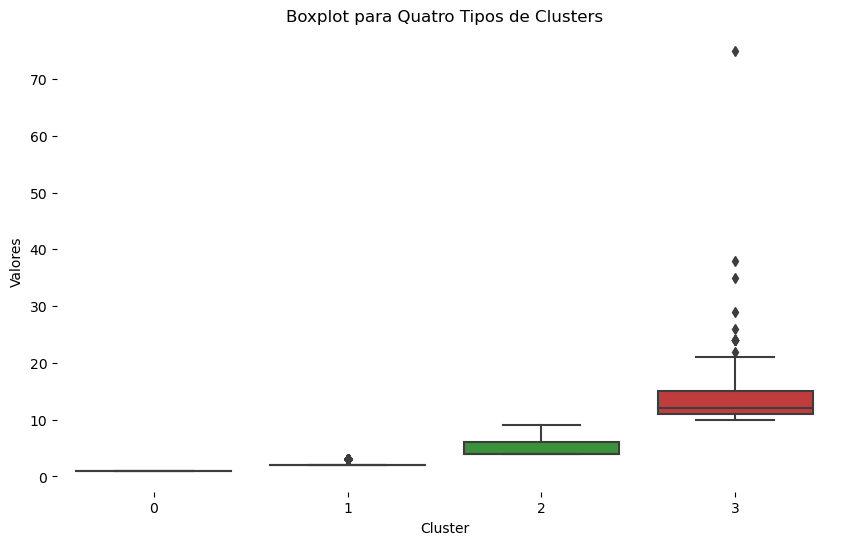

In [44]:
# Criação do boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='FrequenciaCluster', y='frequencia', data=rfm)

plt.title('Boxplot Frequência')
plt.xlabel('Cluster')
plt.ylabel('Valores')

#Removendo as bordas (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

### - Criando a coluna ReceitaCluster

In [45]:
df_pagamento = rfm[['receita']]
kmeans = KMeans(n_clusters=4)
rfm['ReceitaCluster'] = kmeans.fit_predict(df_pagamento)

C:\Users\luizf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [46]:
rfm

id_unico_cliente  recencia  frequencia  receita  \
0      0000366f3b9a7992bf8c76cfdf3221e2       115           1   129.90   
1      0000b849f77a49e4a4ce2b2a4ca5be3f       118           1    18.90   
2      000ec5bff359e1c0ad76a81a45cb598f        12           1    14.96   
3      000ed48ceeb6f4bf8ad021a10a3c7b43       105           1    12.88   
4      00172711b30d52eea8b313a7f2cced02        37           1    74.50   
...                                 ...       ...         ...      ...   
94082  eae0a83d752b1dd32697e0e7b4221656       131          15  1821.73   
94083  ef8d54b3797ea4db1d63f0ced6a906e9       136          10  2849.90   
94084  efce1ab3e96ccab8b1b464326bd22417       159          11   795.30   
94085  f7ea4eef770a388bd5b225acfc546604       193          14   419.86   
94086  fe2b2f70f3dc31c23319ae1029eac77f       176          11   773.50   

       RecenciaCluster  FrequenciaCluster  ReceitaCluster  
0                    3                  0               0  
1                    3                  0               0  
2                    3                  0               0  
3                    3                  0               0  
4                    3                  0               0  
...                ...                ...             ...  
94082                2                  3               1  
94083                2                  3               1  
94084                2                  3               2  
94085                2                  3               2  
94086                2                  3               2  

[94087 rows x 7 columns]

In [47]:
rfm[['receita', "ReceitaCluster"]].groupby('ReceitaCluster').mean()

receita
ReceitaCluster             
0                 94.056175
1               1629.415916
2                474.817485
3               6761.518276

In [48]:
rfm = ordenador_cluster('ReceitaCluster','receita',rfm, True)
rfm.groupby('ReceitaCluster')['receita'].describe()

count         mean          std      min      25%       50%  \
ReceitaCluster                                                                  
0               83947.0    94.056175    63.210618     0.85    44.90    79.900   
1                9085.0   474.817485   182.864157   284.10   330.00   399.900   
2                1026.0  1629.415916   576.714386  1049.97  1199.99  1429.895   
3                  29.0  6761.518276  2344.492319  4219.80  4800.00  6248.000   

                    75%       max  
ReceitaCluster                     
0                129.99    284.00  
1                579.99   1049.80  
2               1890.00   4099.99  
3               7798.00  13440.00

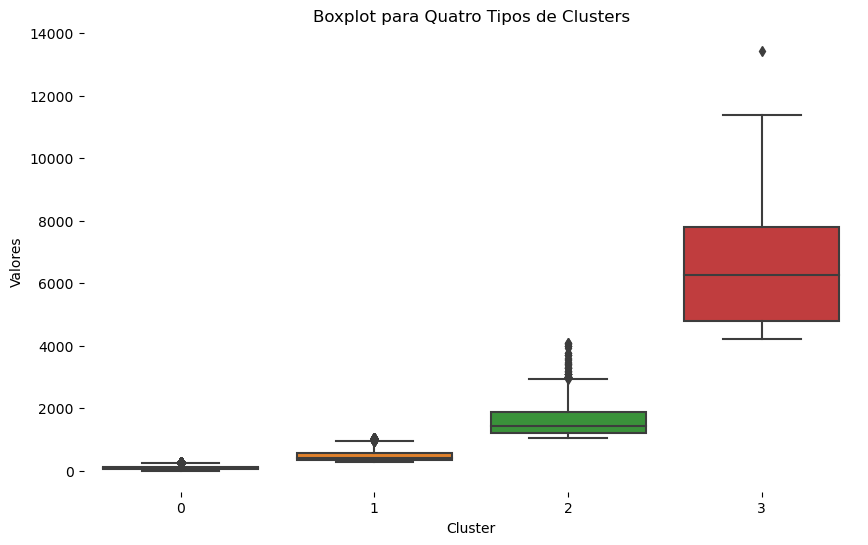

In [49]:
# Criação do boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='ReceitaCluster', y='receita', data=rfm)

plt.title('Boxplot Receita')
plt.xlabel('Cluster')
plt.ylabel('Receita')

#Removendo as bordas (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

### - Criando uma metodologia para segmentar nossos clientes atraves de pontuação (score)

In [50]:
df_final = rfm[['id_unico_cliente', 'recencia', 'RecenciaCluster', 'frequencia', 'FrequenciaCluster', 'receita', 'ReceitaCluster']]

In [51]:
df_final

id_unico_cliente  recencia  RecenciaCluster  \
0      0000366f3b9a7992bf8c76cfdf3221e2       115                3   
1      0000b849f77a49e4a4ce2b2a4ca5be3f       118                3   
2      000ec5bff359e1c0ad76a81a45cb598f        12                3   
3      000ed48ceeb6f4bf8ad021a10a3c7b43       105                3   
4      00172711b30d52eea8b313a7f2cced02        37                3   
...                                 ...       ...              ...   
94082  301d1ce5a76b7e1bc47e5115bf5eb6ba        68                3   
94083  8af7ac63b2efbcbd88e5b11505e8098a       500                0   
94084  c4b224d2c784bae11ae98b6ae9f2454c       461                0   
94085  f9ae226291893fda10af7965268fb7f6       540                0   
94086  85963fd37bfd387aa6d915d8a1065486       200                2   

       frequencia  FrequenciaCluster   receita  ReceitaCluster  
0               1                  0    129.90               0  
1               1                  0     18.90               0  
2               1                  0     14.96               0  
3               1                  0     12.88               0  
4               1                  0     74.50               0  
...           ...                ...       ...             ...  
94082          14                  3   6019.86               3  
94083          29                  3  11383.95               3  
94084          15                  3  10856.10               3  
94085          35                  3   5436.50               3  
94086          24                  3   9888.00               3  

[94087 rows x 7 columns]

In [52]:
df_final['Pontuacao'] = rfm['RecenciaCluster'] + rfm['FrequenciaCluster'] +rfm['ReceitaCluster']
df_final.head()

C:\Users\luizf\AppData\Local\Temp\ipykernel_9156\382850266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Pontuacao'] = rfm['RecenciaCluster'] + rfm['FrequenciaCluster'] +rfm['ReceitaCluster']


id_unico_cliente  recencia  RecenciaCluster  frequencia  \
0  0000366f3b9a7992bf8c76cfdf3221e2       115                3           1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f       118                3           1   
2  000ec5bff359e1c0ad76a81a45cb598f        12                3           1   
3  000ed48ceeb6f4bf8ad021a10a3c7b43       105                3           1   
4  00172711b30d52eea8b313a7f2cced02        37                3           1   

   FrequenciaCluster  receita  ReceitaCluster  Pontuacao  
0                  0   129.90               0          3  
1                  0    18.90               0          3  
2                  0    14.96               0          3  
3                  0    12.88               0          3  
4                  0    74.50               0          3

In [53]:
df_final.Pontuacao.max(), df_final.Pontuacao.min()

(9, 0)

### Definindo nomes para os clusters

In [54]:
#df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis = 1)
df_final['Segmento'] = 'Inativo'
df_final.loc[df_final['Pontuacao']>=2, 'Segmento'] = 'Business'
df_final.loc[df_final['Pontuacao']>=4, 'Segmento'] = 'Master'
df_final.loc[df_final['Pontuacao']>=6, 'Segmento'] = 'Premium'

C:\Users\luizf\AppData\Local\Temp\ipykernel_9156\3292834494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Segmento'] = 'Inativo'


In [55]:
df_final.tail()

id_unico_cliente  recencia  RecenciaCluster  \
94082  301d1ce5a76b7e1bc47e5115bf5eb6ba        68                3   
94083  8af7ac63b2efbcbd88e5b11505e8098a       500                0   
94084  c4b224d2c784bae11ae98b6ae9f2454c       461                0   
94085  f9ae226291893fda10af7965268fb7f6       540                0   
94086  85963fd37bfd387aa6d915d8a1065486       200                2   

       frequencia  FrequenciaCluster   receita  ReceitaCluster  Pontuacao  \
94082          14                  3   6019.86               3          9   
94083          29                  3  11383.95               3          6   
94084          15                  3  10856.10               3          6   
94085          35                  3   5436.50               3          6   
94086          24                  3   9888.00               3          8   

      Segmento  
94082  Premium  
94083  Premium  
94084  Premium  
94085  Premium  
94086  Premium

In [56]:
df_final[['recencia','frequencia','receita', 'Segmento']].groupby('Segmento').mean()

recencia  frequencia      receita
Segmento                                     
Business  158.568217    1.186268   136.257785
Inativo   395.694188    1.055043   103.041447
Master    103.652561    2.249175   416.669608
Premium   102.081841    6.613811  1306.360256

In [57]:
df_final.describe()

recencia  RecenciaCluster    frequencia  FrequenciaCluster  \
count  94087.000000     94087.000000  94087.000000       94087.000000   
mean     241.902558         1.656679      1.239077           0.171416   
std      153.156396         1.060817      0.850594           0.431221   
min        0.000000         0.000000      1.000000           0.000000   
25%      118.000000         1.000000      1.000000           0.000000   
50%      222.000000         2.000000      1.000000           0.000000   
75%      351.000000         3.000000      1.000000           0.000000   
max      728.000000         3.000000     75.000000           3.000000   

            receita  ReceitaCluster     Pontuacao  
count  94087.000000    94087.000000  94087.000000  
mean     149.620196        0.119294      1.947389  
std      249.746766        0.358780      1.223732  
min        0.850000        0.000000      0.000000  
25%       48.900000        0.000000      1.000000  
50%       89.900000        0.000000      2.000000  
75%      159.900000        0.000000      3.000000  
max    13440.000000        3.000000      9.000000

In [58]:
df_final.to_csv('RFM.csv', index=False)

In [59]:
def plot_segmento(x,y,data):
    sns.set(palette='muted', color_codes=True, style='whitegrid')
    plt.figure(figsize=(16,8))
    sns.scatterplot(x=x,y=y,hue='Segmento', data=data, size='Segmento', sizes=(50,150), size_order=['Premium', 'Master', 'Business', 'Inativo'])
    plt.show()
    

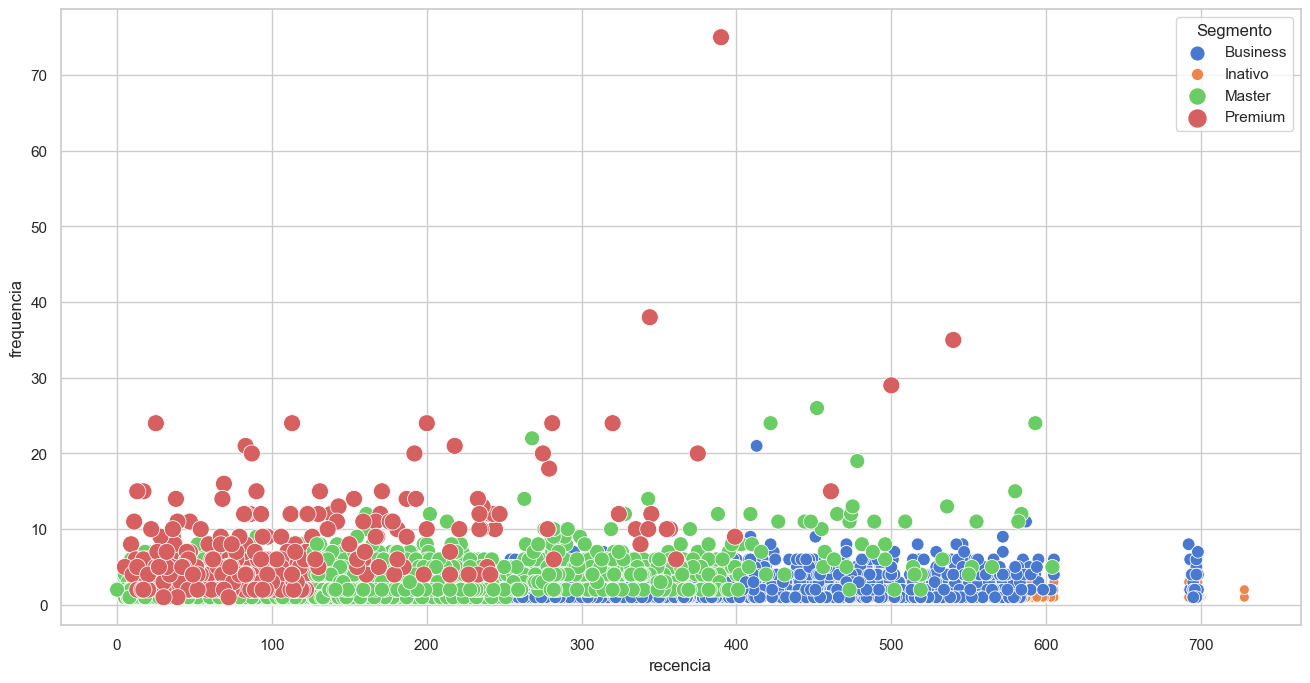

In [60]:
plot_segmento('recencia', 'frequencia', df_final)

In [61]:
plot_segmento('frequencia', 'receita', df_final)

In [62]:
plot_segmento('recencia', 'receita', df_final)

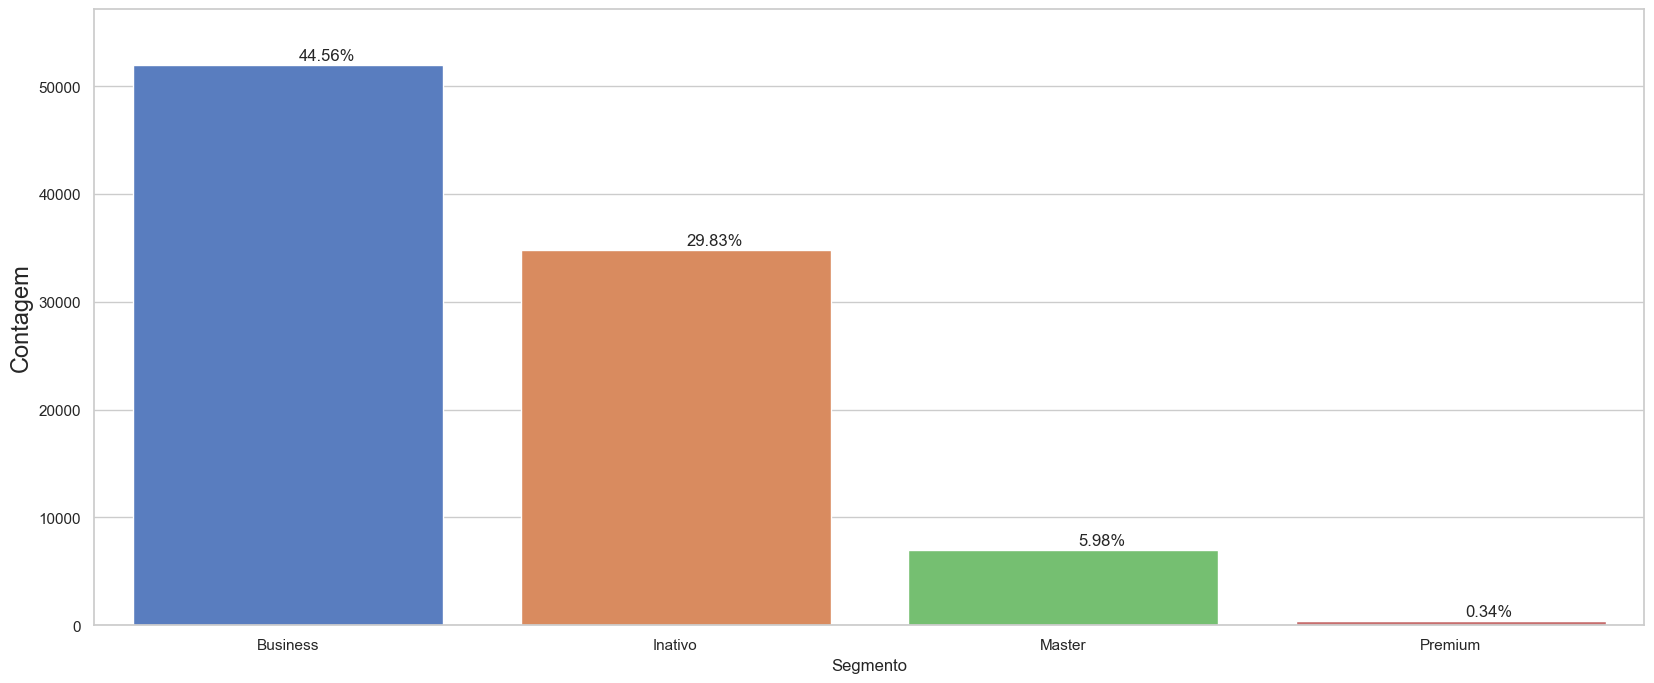

In [63]:
plot_perc('Segmento', df_final);

In [64]:
img1 = Image.open('FreqxRec.png')
img1

**Cliente promissor** : É aquele cliente que compra bastante, e há pouco tempo ele comprou, e a gente pode aumentar a quantidade de compras dele, ou transformar em um cliente fiel a partir de **recomendações específicas**.

**Clientes escorregões** : são aqueles clientes que não compram há muito tempo. Eles compravam com certa frequência e faz muito tempo que não compram mais. Então, veja que para eles irem para o negativo é um passinho. Seria interessante a gente retomar esses clientes por meio de **promoções**.

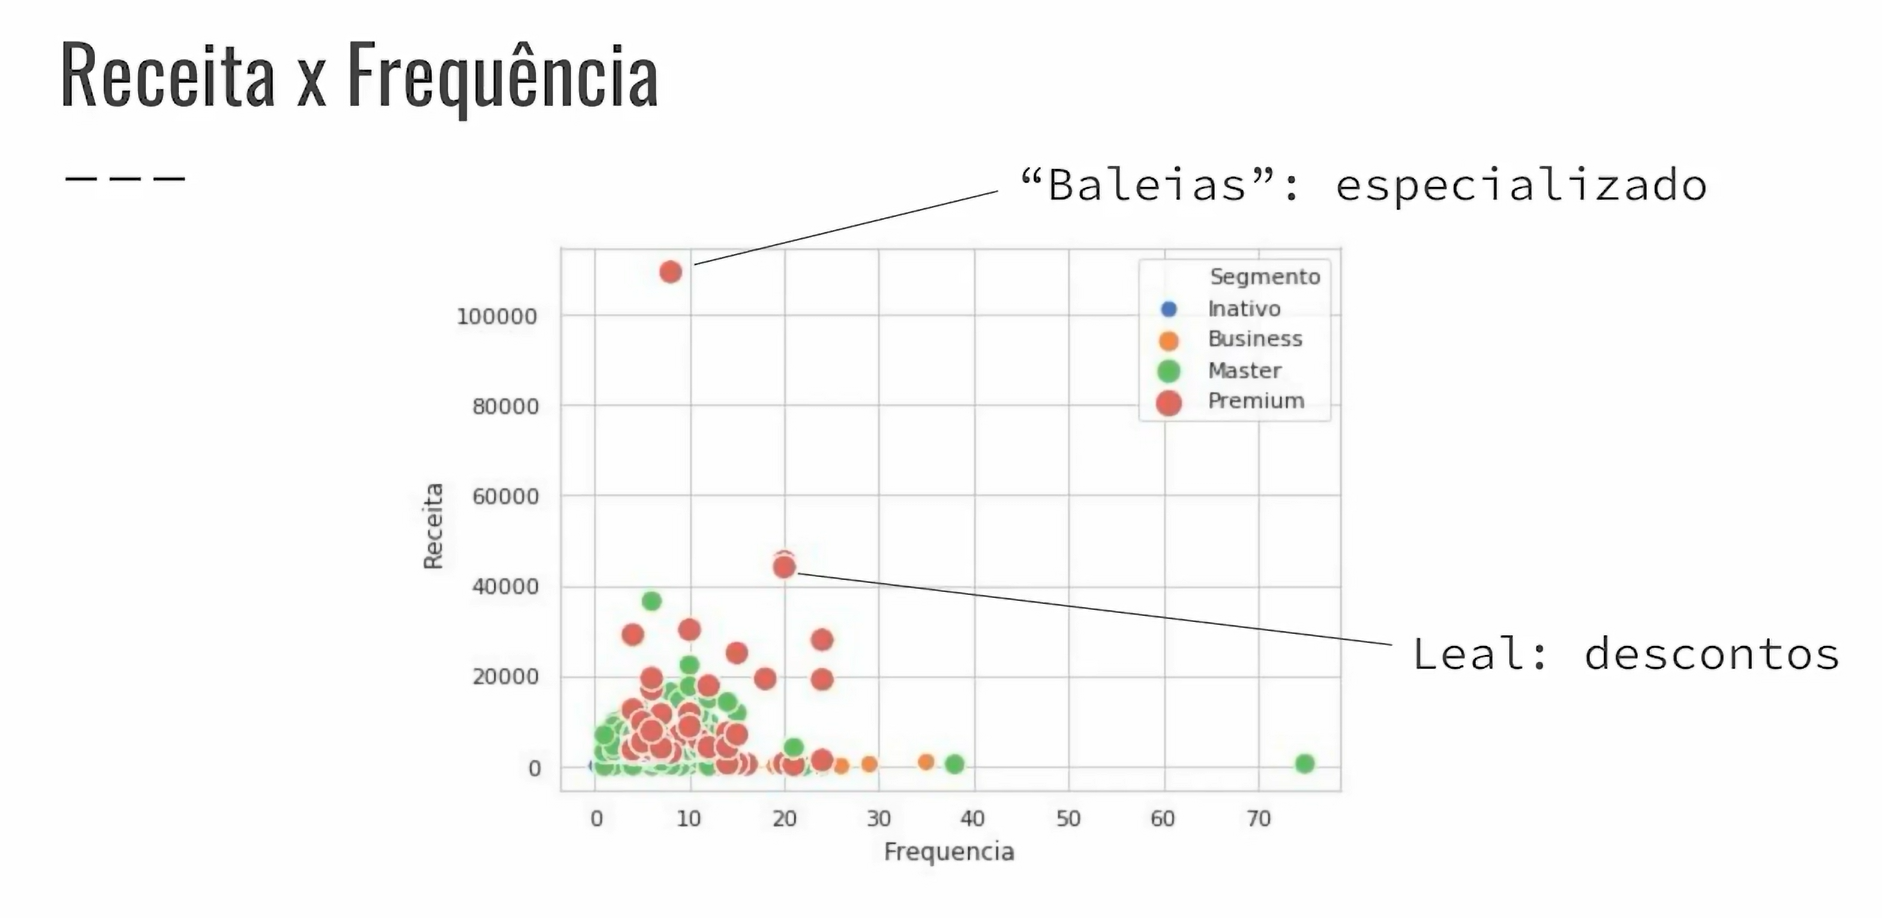

In [65]:
img2 = Image.open('RecxFreq.png')
img2

**Baleias** : São aqueles clientes que gastam muito dinheiro. Para esse dinheiro o cupom de desconto não vale muita coisa. Para ele um **atendimento personalizado** ou **indicação de produto** vale muito mais a pena. A gente consegue converter essa compra de forma mais eficiente.

**Leais** : são aqueles clientes que compram com bastante frequência, e um valor bastante razoável. Eles confiam na loja. Então **descontos**, **programas especializados**, um sistema, capitar esse cliente como membro é muito importante no esquema de fidelidade.

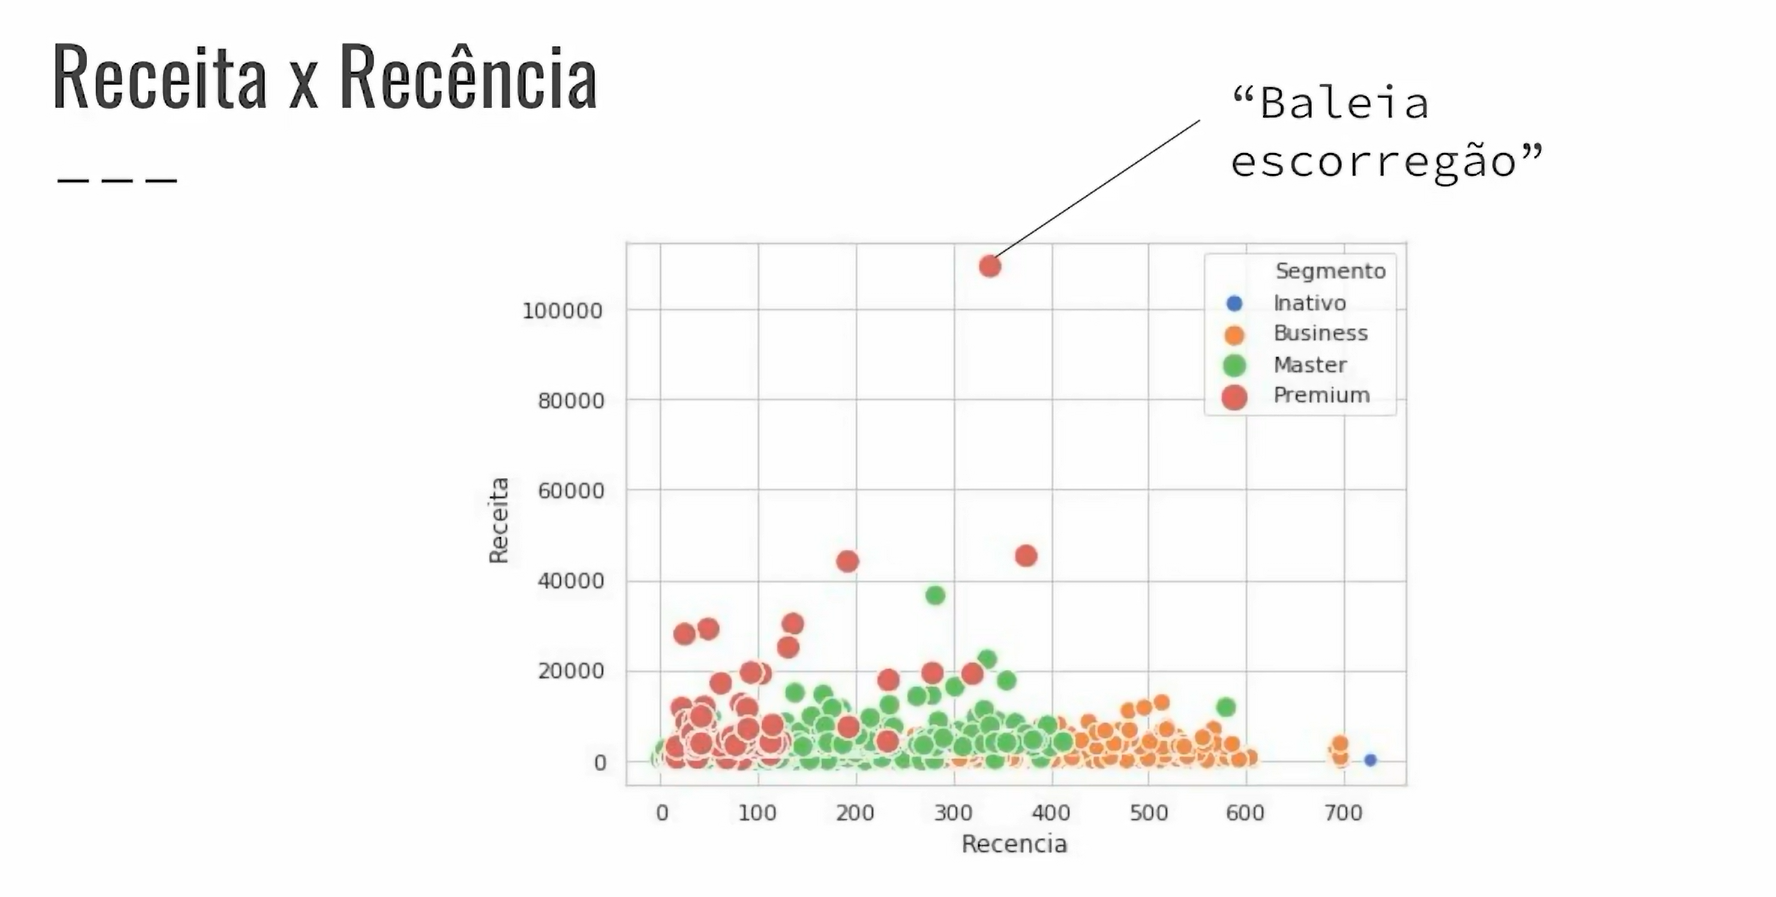

In [66]:
img3 = Image.open('RecxRec.png')
img3

**Baleia Escorregão** : Ele junta tanto as características da baleia quanto de escorregão. Ele gasta muito, só que faz muito tempo que ele não compra, a recência é alta, e a gente precisa recuperar esse cliente. É interessante uma **campanha de marketing específica** para recuperar esse tipo de cliente, **atendimento especializado**. Às vezes até ligar para esse cliente para entender quais são as demandas dele.

- Nosso trabalho de segmentação foi realizado pelo modelo **RFM**.
    - **Recência**: Há quantos dias foi a última compra desse cliente? 
    - **Frequência** : Quantas compras esse cliente já fez na empresa desde que se cadastrou?
    - **Monetaridade/Receita**: Quanto esse cliente já gastou em dinheiro na sua empresa?


#### Ações a serem tomadas:

    - Recuperar clientes "inativos" com promoções ou cupons especiais.
    
    - Seria interessante fornecedor descontos especiais de frete aos "masters", que são aqueles clientes que têm uma pontuação razoável.
    
    - E a gente tem o desconto especial aos "premiums", atendimento especializado, já que apenas 0,6% desses clientes estão dentro do segmento premium, então eles merecem mais atenção uma vez que eles têm uma nota maior.